In [29]:
import tensorflow as tf
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import seaborn as sn 
import pandas as pd
import matplotlib.pyplot as plt 


X = loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Indian_pines (1).mat')['indian_pines']
Y = loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Indian_pines_gt (1).mat')['indian_pines_gt']

x_ = X.reshape((145*145, 220))
y = Y.reshape((145*145, 1))

In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

x = sc_X.fit_transform(x_)

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.25, random_state=0, stratify=y)

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(17, activation = tf.nn.softmax))


In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
import numpy as np
# x_train = np.array(y_train)

In [33]:
model.fit(x_train, y_train, batch_size=256, epochs=150)

Epoch 1/150
62/62 [==============================] - 1s 3ms/step - loss: 1.5692 - accuracy: 0.5337
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 0.9854 - accuracy: 0.6393
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.7065
Epoch 4/150
62/62 [==============================] - 0s 4ms/step - loss: 0.7875 - accuracy: 0.7123
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.7458
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.7595
Epoch 7/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6140 - accuracy: 0.7705
Epoch 8/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5826 - accuracy: 0.7782
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7808
Epoch 10/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5331 - accuracy: 0.8037
Epoch 11/

In [9]:
y_pred =  model.predict_classes(x_test)

C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2218,    2,   49,   17,   17,   15,   32,    0,   18,    1,   32,
          71,   22,    6,  133,   59,    2],
       [   3,    8,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [  25,    0,  291,    4,    1,    0,    0,    0,    0,    0,    8,
          27,    1,    0,    0,    0,    0],
       [  22,    0,    6,  147,    4,    0,    0,    0,    0,    0,    0,
          22,    7,    0,    0,    0,    0],
       [   8,    0,    2,    7,   41,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0],
       [  29,    0,    0,    0,    1,   89,    0,    0,    0,    0,    0,
           1,    1,    0,    0,    0,    0],
       [  23,    0,    0,    0,    0,    0,  157,    0,    0,    0,    1,
           1,    0,    0,    0,    1,    0],
       [   1,    0,    0,    0,    0,    0,    0,    6,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [  10,    0,    0,    0,    0,    0,    0

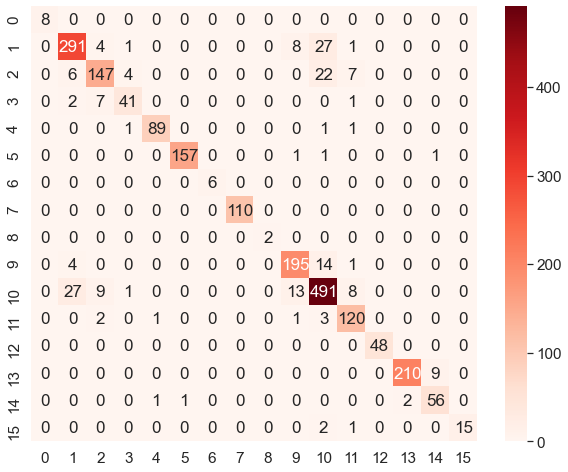

In [11]:
 df_cm = pd.DataFrame(cm[1:17, 1:17] ) # columns=np.unique(names), index = np.unique(names))


plt.figure(figsize = (10,8))

sn.set(font_scale=1.4) #for label size

sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 17}, fmt='d')

plt.savefig('cmap.png', dpi=300)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.7996956439033669

In [13]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

165/165 [==============================] - 0s 1ms/step - loss: 0.7667 - accuracy: 0.7997
0.7666937708854675 0.7996956706047058


In [14]:
y_predicted = model.predict(x_test)
y_predicted[15]

array([9.7609282e-01, 7.1496939e-17, 7.8696659e-12, 1.0814339e-23,
       2.2121840e-12, 6.6834129e-11, 2.3629151e-02, 1.2588827e-13,
       9.3850756e-20, 5.8091383e-16, 8.6679409e-14, 3.2511173e-06,
       7.5989232e-15, 8.2002378e-15, 2.7899481e-11, 2.7473559e-04,
       1.2158900e-21], dtype=float32)

In [15]:
import numpy as np
print(np.argmax(y_predicted[15]))

0


In [22]:
print(x_train[155])

[-0.11317525 -0.05034236  0.01428746  0.00365109  0.03974178  0.02910662
  0.01562484  0.02564924  0.01064904  0.02727946  0.02791215  0.02596736
  0.03788744  0.02749315  0.03323734  0.03322718  0.04325523  0.04345582
  0.03935009  0.03928297  0.03610404  0.04123425  0.03359268  0.03352221
  0.03399358  0.03617417  0.03382424  0.0353526   0.03377112 -0.05607377
  0.03970896 -0.05448994  0.04158913  0.04656461  0.06101221  0.04461097
  0.00162238 -0.01933227 -0.03012516 -0.0205084  -0.0287734  -0.03424291
 -0.04090416 -0.03946793 -0.02839626 -0.03020904 -0.04273365 -0.04406334
 -0.03052475 -0.03940736 -0.04097159 -0.0376745  -0.03418521 -0.03344894
 -0.02730693 -0.02497047  0.00846373 -0.04093913 -0.03825725 -0.03176716
 -0.1352994  -0.00218645 -0.01457261 -0.01346359 -0.01254021 -0.0193447
 -0.01624604 -0.01550833 -0.01698362 -0.02242183 -0.01267843 -0.01718517
 -0.0206672  -0.00872164 -0.11698964  0.00900374 -0.02914525 -0.02219199
 -0.00708814 -0.02046618  0.02170112  0.04277601  0.